In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing
---

In [41]:
data = pd.read_csv("loan_data.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


## Data Types
The concerning columns for me were:
* Loan_ID - Turn out the loan ID has numbers
* Dependents - For some reason the have dependents listed as 0,1,2 and then 3+ which is what caused this to be classified as a string


In [42]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Null Values

Turns out my data set has a couple of null values, this is a good opportunity to figure out what to do with these!
- `Gender` - For the nulls in gender I will replace them with undisclosed becuase this may be a result of people not wanting to disclose their gender

- `Credit History` - This variable is intresing. According to the website, it is a categorical variable based on if the applicent meets the requirements for the credit loan, so the null values could be people who did not have a credit history or did not submit one. I will assume this for these values and replace null values with no credit history.

- `Self-Employed` - This values is tricky. The data set source states that this value is yes/no if the person is self-employed. The problem here is i'm not sure what **No** means. It could mean they are employed just not self-employed, or it could mean that they are employed or not employed. 


In [45]:
data.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
data[data.isnull().any(axis = 1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
10,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
13,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
16,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
20,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,LP002833,Male,Yes,0,Not Graduate,No,4467,0.0,120.0,360.0,NaN,Rural,Y
361,LP002872,NaN,Yes,0,Graduate,No,3087,2210.0,136.0,360.0,0.0,Semiurban,N
366,LP002898,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,NaN,Rural,N
370,LP002925,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,Y


### Fixing the Null Values

In [46]:
#Replacing Null Values for Gender
data["Gender"].fillna(value = "Not_disclosed", inplace=True)

#Replacing Null Values for Credit History
data["Credit_History"].fillna(value = "Not_disclosed", inplace=True)


In [47]:
#Checking what other null values we still have to handle
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
#To prevent bias we will drop the remaining nulls
data = data.dropna()

In [49]:
#Results
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Number of bins
It looks like there a couple of bins, but what's most concerning to me is the fact that some non-dicrete variables also have bins, like ApplicantIncome. The most shocking feature with bins was coapplicant income becuase there is a large amount that is listed as 0.0

What's important is finding the featuers where we will use one hot-encoding




In [50]:
for x in data:
    print(f"{x}: \n{data[x].value_counts()}\n")

Loan_ID: 
LP001003    1
LP002296    1
LP002337    1
LP002332    1
LP002318    1
           ..
LP001699    1
LP001698    1
LP001693    1
LP001692    1
LP002990    1
Name: Loan_ID, Length: 343, dtype: int64

Gender: 
Male             265
Female            73
Not_disclosed      5
Name: Gender, dtype: int64

Married: 
Yes    209
No     134
Name: Married, dtype: int64

Dependents: 
0     215
2      54
1      48
3+     26
Name: Dependents, dtype: int64

Education: 
Graduate        253
Not Graduate     90
Name: Education, dtype: int64

Self_Employed: 
No     311
Yes     32
Name: Self_Employed, dtype: int64

ApplicantIncome: 
2500    7
2600    4
4583    4
3500    3
3333    3
       ..
2971    1
2491    1
3155    1
3463    1
4106    1
Name: ApplicantIncome, Length: 294, dtype: int64

CoapplicantIncome: 
0.0       157
1666.0      4
2500.0      3
2531.0      2
1800.0      2
         ... 
1083.0      1
1250.0      1
3021.0      1
983.0       1
1950.0      1
Name: CoapplicantIncome, Length: 171, dt

Based on out output above we know our continuous variables are: 
* `ApplicantIncome`
* `CoapplicantIncome`
* `LoanAmount`
* `Loan_Amount_Term`

`LoanAmount` and `Loan_Amount_Term` are two featuers where they are a little on the line. They could be categorical becuase it seems they use terms and amounts that are common. 


In [51]:
for x in data:
    print(f"{x} : {data[x].unique()}")

Loan_ID : ['LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001013' 'LP001024'
 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036' 'LP001038'
 'LP001043' 'LP001047' 'LP001050' 'LP001068' 'LP001073' 'LP001086'
 'LP001095' 'LP001097' 'LP001098' 'LP001112' 'LP001116' 'LP001119'
 'LP001120' 'LP001123' 'LP001131' 'LP001138' 'LP001144' 'LP001146'
 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179' 'LP001194'
 'LP001195' 'LP001197' 'LP001199' 'LP001205' 'LP001206' 'LP001222'
 'LP001228' 'LP001238' 'LP001241' 'LP001245' 'LP001248' 'LP001255'
 'LP001259' 'LP001264' 'LP001265' 'LP001275' 'LP001279' 'LP001280'
 'LP001282' 'LP001316' 'LP001319' 'LP001322' 'LP001325' 'LP001327'
 'LP001333' 'LP001334' 'LP001343' 'LP001345' 'LP001367' 'LP001384'
 'LP001385' 'LP001405' 'LP001430' 'LP001431' 'LP001432' 'LP001443'
 'LP001473' 'LP001478' 'LP001482' 'LP001487' 'LP001489' 'LP001491'
 'LP001493' 'LP001507' 'LP001514' 'LP001518' 'LP001520' 'LP001528'
 'LP001532' 'LP001535' 'LP001560' 'LP001565' 'LP0015

### One-hot encoding
Based on our previous output, the features we will need to process using one-hot encoding include:
* Gender
* Dependents 
* Credit History
* Property Area

These already are binary in nature, so we can just replace the yes and no with 0 and 1:
* Married -> (Yes/No)
* Education -> (Graduated/Not graduated)
* Self-Employed -> (Yes/No)
* Loan Status -> (Y/N)



In [52]:
data = pd.get_dummies(data, columns=['Gender', "Dependents", 'Credit_History', 'Property_Area']) #Notice I did not drop a variable becuase the decision tree is not a linear model

Here were just going to replace values with 1 & 0 insted of yes and no

In [53]:
#Replace values with 1 & 0
data["Loan_Status"] = data['Loan_Status'].map({'Y': 1, 'N': 0}) #Forgot to do this on, this is the actual value
data["Married"] = data['Married'].map({'Yes': 1, 'No': 0})
data["Self_Employed"] = data['Self_Employed'].map({'Yes': 1, 'No': 0})
data["Education"] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})


Lets also remove the loan code before we continue as this can cause problems when training. We will call this, dataForModel


In [54]:
dataForModel = data.drop(columns= ["Loan_ID"])

Checking if that data types are all ints

In [55]:
dataForModel.dtypes

Married                           int64
Education                         int64
Self_Employed                     int64
ApplicantIncome                   int64
CoapplicantIncome               float64
LoanAmount                      float64
Loan_Amount_Term                float64
Loan_Status                       int64
Gender_Female                     uint8
Gender_Male                       uint8
Gender_Not_disclosed              uint8
Dependents_0                      uint8
Dependents_1                      uint8
Dependents_2                      uint8
Dependents_3+                     uint8
Credit_History_0.0                uint8
Credit_History_1.0                uint8
Credit_History_Not_disclosed      uint8
Property_Area_Rural               uint8
Property_Area_Semiurban           uint8
Property_Area_Urban               uint8
dtype: object

Didn't know what a unit8 was until now, but everything looks good

## Basic Statistics
With these statistics, we are looking for outliers and some insight into out featuers. Something important to note is our loan_status variable. I noticed that 72% of our data is approved leaving only 28 for non approved loans. This could mean the data is a little biased. 

This also provide me with information on how things are being valued. 
* **Loan Amount** is in thousands per the data sets source
* Looking at **income**, I think it's income per month since it's so low. This would mean the mean income would be 42850.320696





In [56]:
dataForModel.describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Credit_History_0.0,Credit_History_1.0,Credit_History_Not_disclosed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.00000,343.000000,343.000000,343.000000,...,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,0.609329,0.737609,0.093294,3570.860058,1292.011429,104.769679,340.58309,0.717201,0.212828,0.772595,...,0.626822,0.139942,0.157434,0.075802,0.139942,0.772595,0.087464,0.279883,0.396501,0.323615
std,0.488613,0.440577,0.291270,1419.188607,2433.327502,28.864414,69.00486,0.451017,0.409905,0.419769,...,0.484355,0.347433,0.364742,0.265067,0.347433,0.419769,0.282926,0.449598,0.489885,0.468539
min,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2583.000000,0.000000,90.000000,360.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,3333.000000,923.000000,110.000000,360.00000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,4255.500000,2000.000000,128.000000,360.00000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,9703.000000,33837.000000,150.000000,480.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


I'm just going to change the income columns to yearly salary 

In [57]:
dataForModel["ApplicantIncome"] = dataForModel["ApplicantIncome"] * 12
dataForModel["CoapplicantIncome"] = dataForModel["CoapplicantIncome"] * 12

## Important Info
* 71% of our loan_status is what I would consider "Normal" or approved
* I kinda wanted to tryout the Naive Bayes algorithm, becuase I like the name. However, we have continoues variables that we would need to convert into catergorical variables, let's see what we can do about that. 

In [58]:
dataForModel

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Credit_History_0.0,Credit_History_1.0,Credit_History_Not_disclosed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,54996,18096.0,128.0,360.0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,1,1,1,36000,0.0,66.0,360.0,1,0,1,...,1,0,0,0,0,1,0,0,0,1
2,1,0,0,30996,28296.0,120.0,360.0,1,0,1,...,1,0,0,0,0,1,0,0,0,1
3,0,1,0,72000,0.0,141.0,360.0,1,0,1,...,1,0,0,0,0,1,0,0,0,1
4,1,0,0,27996,18192.0,95.0,360.0,1,0,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,0,68436,0.0,128.0,360.0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
377,1,1,0,38784,23400.0,108.0,360.0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
378,0,1,0,34800,0.0,71.0,360.0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
379,1,1,0,49272,0.0,40.0,180.0,1,0,1,...,0,0,0,1,0,1,0,1,0,0


In [77]:
dataForModel.describe()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Female,Gender_Male,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Credit_History_0.0,Credit_History_1.0,Credit_History_Not_disclosed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.00000,343.000000,343.000000,343.000000,...,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,0.609329,0.737609,0.093294,42850.320700,15504.137142,104.769679,340.58309,0.717201,0.212828,0.772595,...,0.626822,0.139942,0.157434,0.075802,0.139942,0.772595,0.087464,0.279883,0.396501,0.323615
std,0.488613,0.440577,0.291270,17030.263283,29199.930023,28.864414,69.00486,0.451017,0.409905,0.419769,...,0.484355,0.347433,0.364742,0.265067,0.347433,0.419769,0.282926,0.449598,0.489885,0.468539
min,0.000000,0.000000,0.000000,1800.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,30996.000000,0.000000,90.000000,360.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,39996.000000,11076.000000,110.000000,360.00000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,51066.000000,24000.000000,128.000000,360.00000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,116436.000000,406044.000000,150.000000,480.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Visualizations
---
To begin we will use a heatmap to understand which variables are correlated.

## Heatmap
* Credit History is an intresting value to keep in mind for classifying if the entry predicts loan_Status. According to our source, credit history is 0 when the reqirements for credit history are met vs 1 when they are not, which makes sense, but might take away from other values. 


<AxesSubplot:>

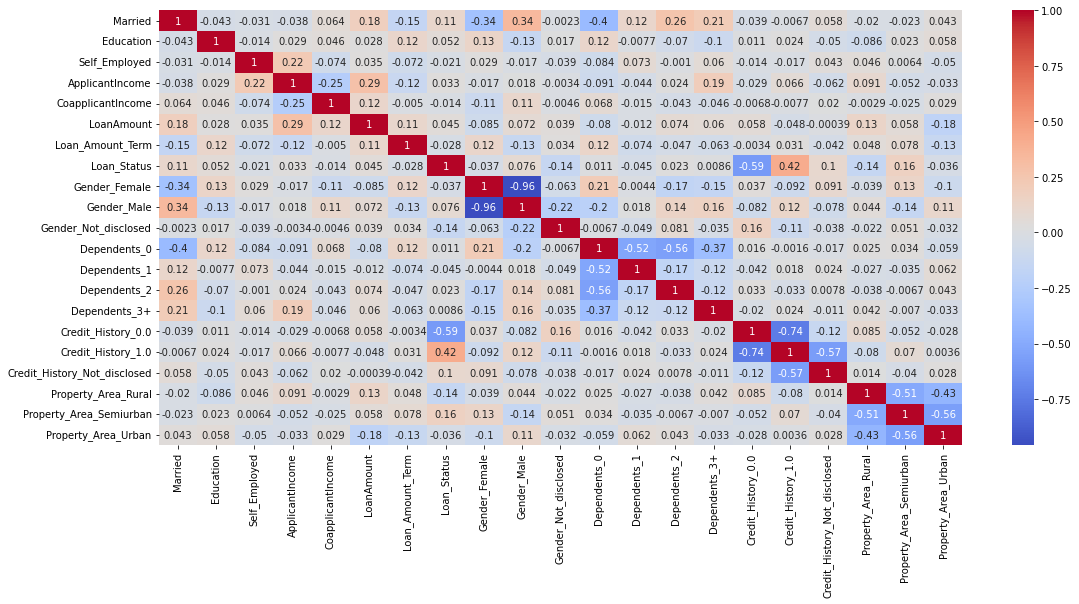

In [59]:
#Heatmap visualization
corr = dataForModel.corr()
plt.figure(figsize = (18,8))
sns.heatmap(corr, annot = True, cmap='coolwarm')

# Modeling
---


## Models Used
* Decision Tree

* Support Vector Machine:


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# from sklearn.utils import resampleq
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

## Creating variables for testing, training, ya know
Here we will create the variables for our data

In [112]:
#Creating Variables 
X = dataForModel.drop(columns = ["Loan_Status"])
y = dataForModel["Loan_Status"]

Now we need to create splits in our data and use some of it for training, and some of it for testing. 

In [113]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, stratify=y)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [114]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (274, 20)
X_test (69, 20)
y_train (274,)
y_test (69,)


Also, it important to remember that we only have 28% of our data that is of our abnormal class, so lets make sure to provide some weights so the model is not to biased

In [115]:
from sklearn.utils import class_weight
weights = class_weight.compute_sample_weight('balanced', y_train)

## Decision Tree

Now we can train our model using the decision tree regressor class

In [209]:
first_model = DecisionTreeClassifier()

first_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Testing Model, Interpretations, and Stuff


Now were going to make our predictions  

In [210]:
predictions1 = first_model.predict(X_test)

### First Run Results

Precision: 0.8269230769230769 
Recall: 0.8775510204081632


c:\Users\thebe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


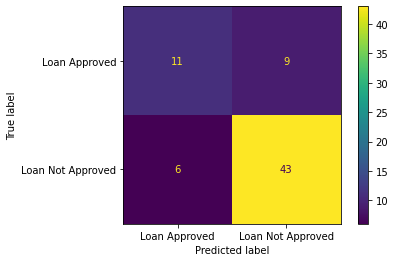

In [211]:
plot_confusion_matrix(first_model, X_test, y_test, values_format='d', display_labels= ["Loan Approved", "Loan Not Approved"])

tn, fp, fn, tp = confusion_matrix(y_test, predictions1).ravel()
precision_score = tp / (tp + fp)
recall_score = tp / (tp + fn)
print(f"Precision: {precision_score} \nRecall: {recall_score}")

With out model we are mostly concerned with predicting unapproved loans more than approved ones so `precision` will be very important. Our results are not bad, lets see if we can make them better

In [188]:
def get_confusion_matrix(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y, sample_weight=weights)
    preds_val = model.predict(val_X)
    tn, fp, fn, tp = confusion_matrix(val_y, preds_val).ravel()
    precision_score = tp / (tp + fp)
    recall_score = tp / (tp + fn)
    print(f"Precision: {precision_score} \nRecall: {recall_score} ")

In [219]:
for maxLeafs in range(5, 505, 5):
    print(f"Leafs: {maxLeafs}")
    get_confusion_matrix(maxLeafs, X_train, X_test, y_train, y_test)

Leafs: 5
Precision: 0.8163265306122449 
Recall: 0.8163265306122449 
Leafs: 10
Precision: 0.8269230769230769 
Recall: 0.8775510204081632 
Leafs: 15
Precision: 0.8222222222222222 
Recall: 0.7551020408163265 
Leafs: 20
Precision: 0.8222222222222222 
Recall: 0.7551020408163265 
Leafs: 25
Precision: 0.8444444444444444 
Recall: 0.7755102040816326 
Leafs: 30
Precision: 0.8478260869565217 
Recall: 0.7959183673469388 
Leafs: 35
Precision: 0.8636363636363636 
Recall: 0.7755102040816326 
Leafs: 40
Precision: 0.8666666666666667 
Recall: 0.7959183673469388 
Leafs: 45
Precision: 0.8636363636363636 
Recall: 0.7755102040816326 
Leafs: 50
Precision: 0.8636363636363636 
Recall: 0.7755102040816326 
Leafs: 55
Precision: 0.8695652173913043 
Recall: 0.8163265306122449 
Leafs: 60
Precision: 0.8695652173913043 
Recall: 0.8163265306122449 
Leafs: 65
Precision: 0.8695652173913043 
Recall: 0.8163265306122449 
Leafs: 70
Precision: 0.8695652173913043 
Recall: 0.8163265306122449 
Leafs: 75
Precision: 0.869565217391

It looks like the less nodes the better, so we will stick with 10 leafs

### Model 2

In [220]:
second_model = DecisionTreeClassifier(max_leaf_nodes=55)

second_model.fit(X_train, y_train, sample_weight=weights)

second_model_predictions = second_model.predict(X_test)

c:\Users\thebe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


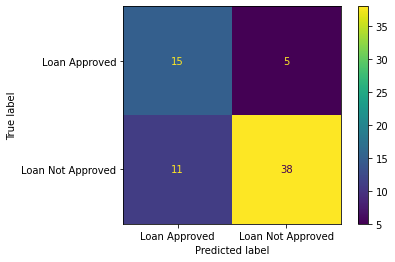

In [221]:
plot_confusion_matrix(second_model, X_test, y_test, values_format='d', display_labels= ["Loan Approved", "Loan Not Approved"])

In [231]:
tn, fp, fn, tp = confusion_matrix(y_test, second_model_predictions).ravel()
precision_score = tp / (tp + fp)
recall_score = tp / (tp + fn)
print(f"Precision: {precision_score} \nRecall: {recall_score}")

Precision: 0.8837209302325582 
Recall: 0.7755102040816326


In [232]:
#easier way to do it, thanks to scikit
from sklearn.metrics import precision_score, recall_score
precision_scikit = precision_score(y_test, second_model_predictions)
recall_scikit = recall_score(y_test, second_model_predictions)
print(f"Precision: {precision_scikit} \nRecall: {recall_scikit}")

Precision: 0.8837209302325582 
Recall: 0.7755102040816326


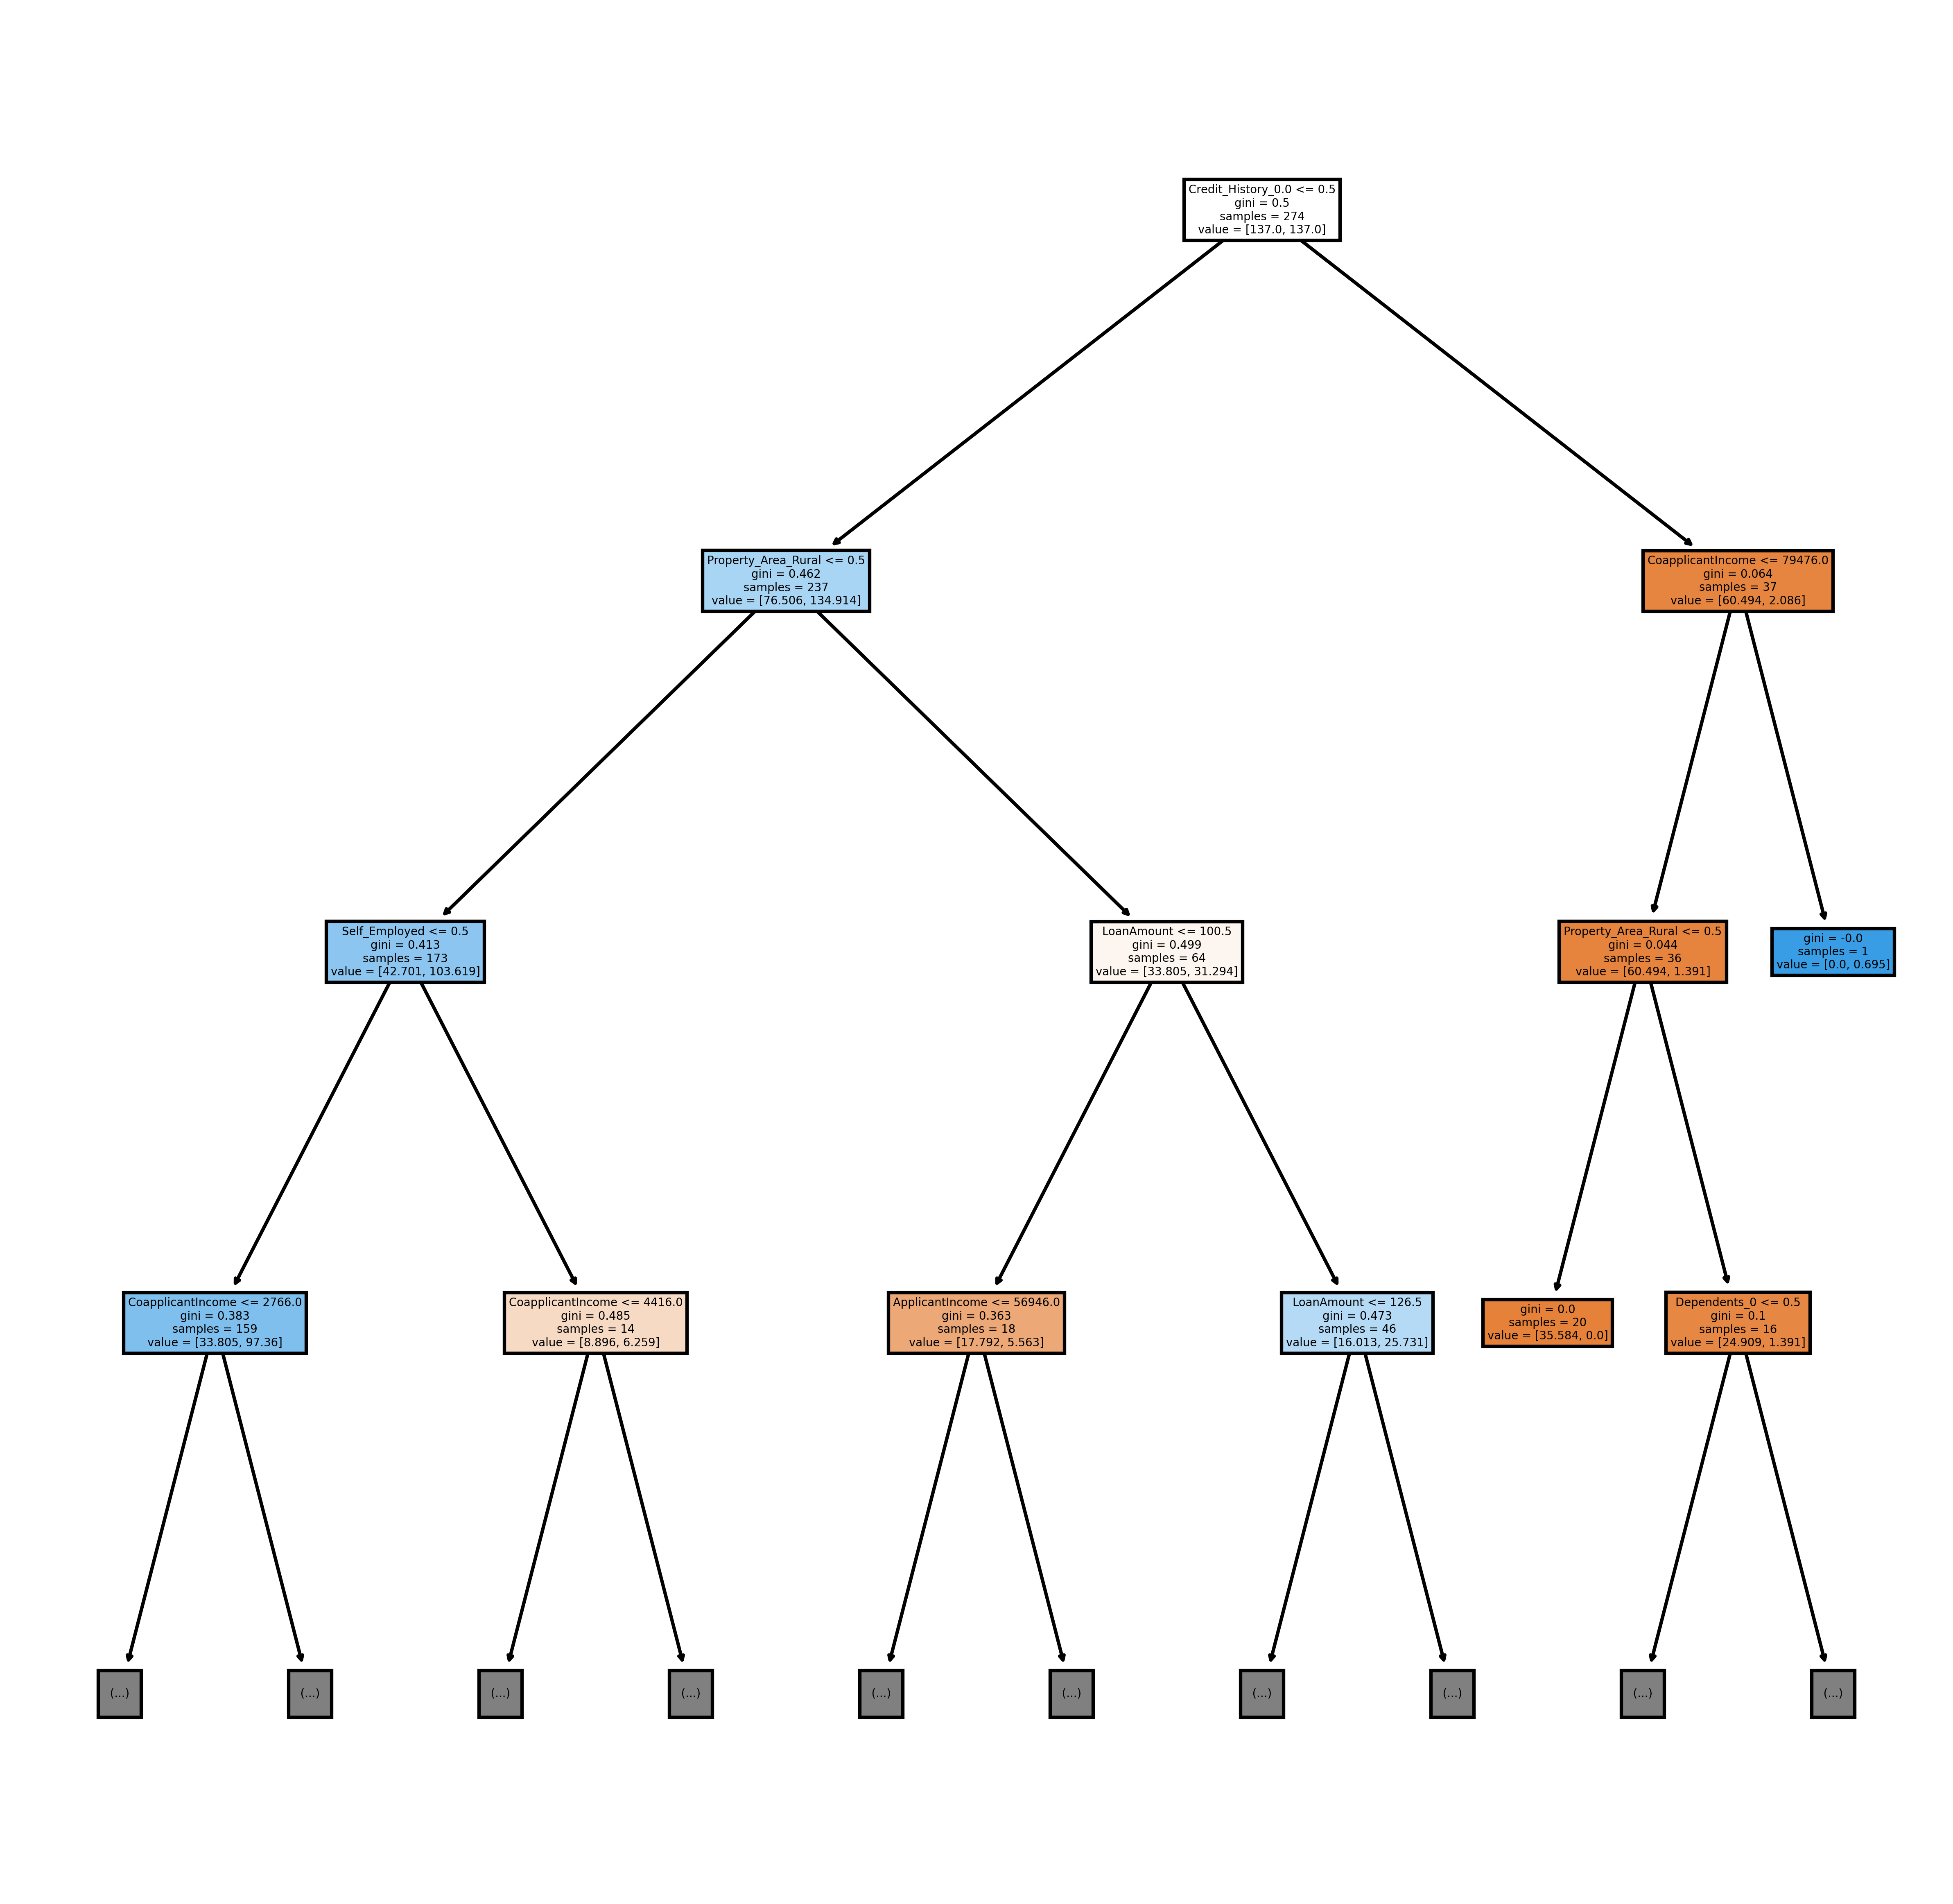

[0 1]


In [235]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10), dpi=600)
tree.plot_tree(second_model, feature_names = X.columns, filled=True, max_depth=3)
plt.show()
print(second_model.classes_)

## Support Vector Machine

### First SVM

Now we can fit our model

In [154]:
clf_svm = SVC()
clf_svm.fit(X_train_scaled, y_train, weights)

SVC()

In [153]:
predictedValues = clf_svm.predict(X_test_scaled)
predictedValues

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0], dtype=int64)

### First SVM - Confusion Matrix

c:\Users\thebe\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


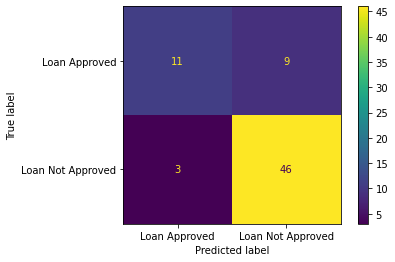

In [152]:
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format='d', display_labels= ["Loan Approved", "Loan Not Approved"])

### Precision & Recall Scores

In [150]:
tn, fp, fn, tp = confusion_matrix(y_test, predictedValues ).ravel()
precision_score = tp / (tp + fp)
recall_score = tp / (tp + fn)
print(f"Precision: {precision_score} \nRecall: {recall_score}")


Precision: 0.8363636363636363 
Recall: 0.9387755102040817


### Scree Plot
Graphing our results using PCA (Principle Component Analysis)

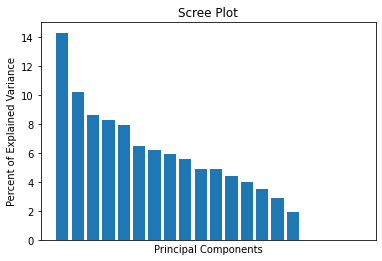

In [151]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)
label = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom = False,
    top = False,
    labelbottom = False
)

plt.ylabel('Percent of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

### Thoughts